# Relative Vigor Index

https://www.investopedia.com/terms/r/relative_vigor_index.asp

https://www.forextraders.com/forex-education/forex-indicators/relative-vigor-index-indicator-explained/

https://www.ifcmarkets.com/en/ntx-indicators/relative-vigor-index

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.208729,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.617897,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.761467,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,50.019855,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.550919,102349600


In [3]:
n = 14 # Number of days
df['Open-Close'] = df['Open'] - df['Adj Close']
df['High-Low'] = df['High'] - df['Low']
df['RVI'] = df['Open-Close'].rolling(n).sum() / df['High-Low'].rolling(n).sum()

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,RVI
Date,,,,,,,,,
2018-08-20,54.525002,54.794998,53.777500,53.865002,51.729435,121150800,2.795567,1.017498,2.247406
2018-08-21,54.200001,54.297501,53.507500,53.759998,51.628597,104639200,2.571404,0.790001,2.394527
2018-08-22,53.525002,54.090000,53.459999,53.762501,51.631001,76072400,1.894001,0.630001,2.846159
2018-08-23,53.662498,54.262501,53.650002,53.872501,51.736652,75532800,1.925846,0.612499,2.896139
2018-08-24,54.150002,54.224998,53.777500,54.040001,51.897499,73905600,2.252502,0.447498,2.951446


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,RVI
Date,,,,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.375179,148676800,1.662319,1.240002,1.457601
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.866356,234330000,-0.791355,2.627499,1.203841
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.620613,212468400,1.339386,1.674999,1.193596
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.639877,169165600,1.735123,0.992500,1.174501
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.003677,140014000,1.628822,0.720001,1.299735


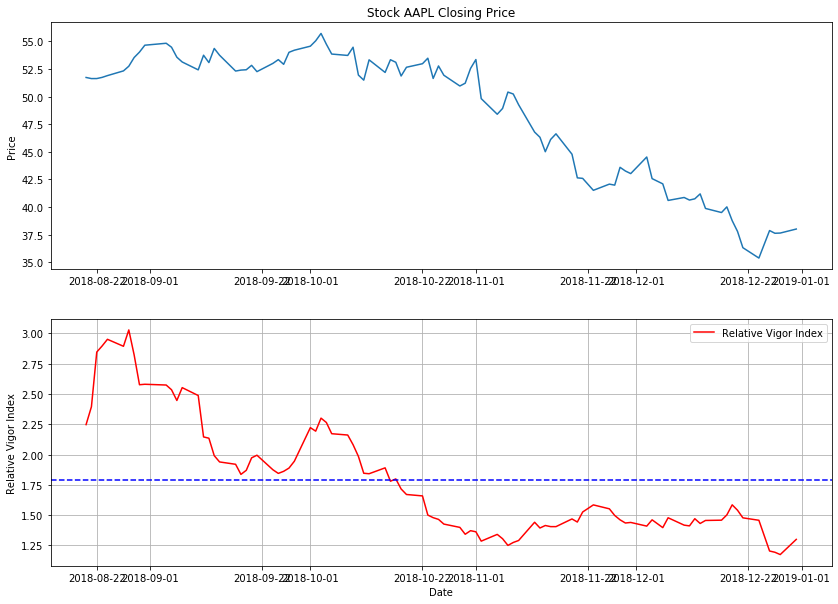

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RVI'], label='Relative Vigor Index', color='red')
ax2.axhline(y=df['RVI'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Relative Vigor Index')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

### Candlestick with Relative Vigor Index

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,RVI,VolumePositive
0,736926.0,54.525002,54.794998,53.777500,53.865002,51.729435,121150800,2.795567,1.017498,2.247406,False
1,736927.0,54.200001,54.297501,53.507500,53.759998,51.628597,104639200,2.571404,0.790001,2.394527,False
2,736928.0,53.525002,54.090000,53.459999,53.762501,51.631001,76072400,1.894001,0.630001,2.846159,False
3,736929.0,53.662498,54.262501,53.650002,53.872501,51.736652,75532800,1.925846,0.612499,2.896139,False
4,736930.0,54.150002,54.224998,53.777500,54.040001,51.897499,73905600,2.252502,0.447498,2.951446,False


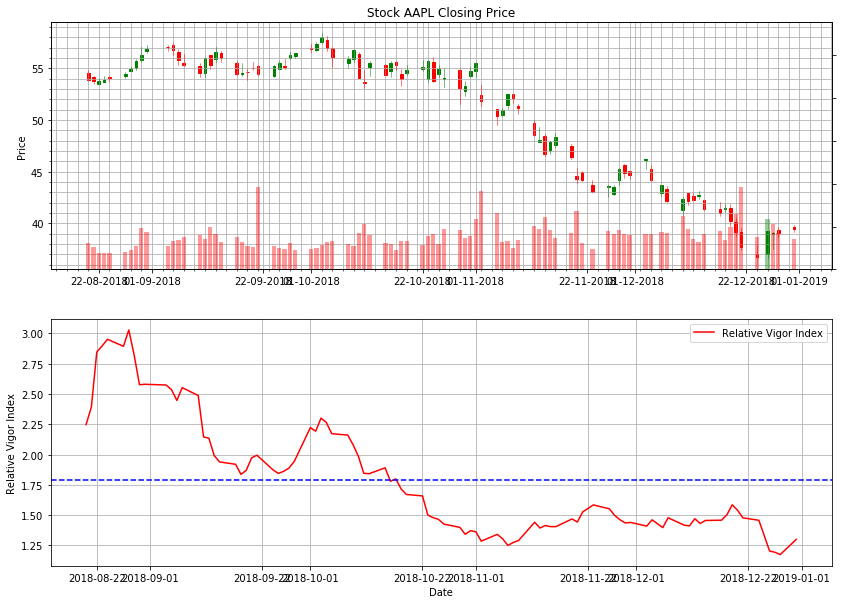

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RVI'], label='Relative Vigor Index', color='red')
ax2.axhline(y=df['RVI'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Relative Vigor Index')
ax2.set_xlabel('Date')
ax2.legend(loc='best')